In [133]:
# Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Load your dataset here
data = pd.read_excel('1.xlsx')

In [135]:
# Ensure InvoiceDate is in datetime format and create a YearMonth column for trend analysis
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

In [136]:
# Calculate total price for each line item
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [137]:
# Aggregate data for total sales per month
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

In [138]:
# Identify top 10 selling products
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [155]:
# Calculate total income for each country sales
total_per_country = data.groupby(
    'Country')['TotalPrice'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Total Sales')

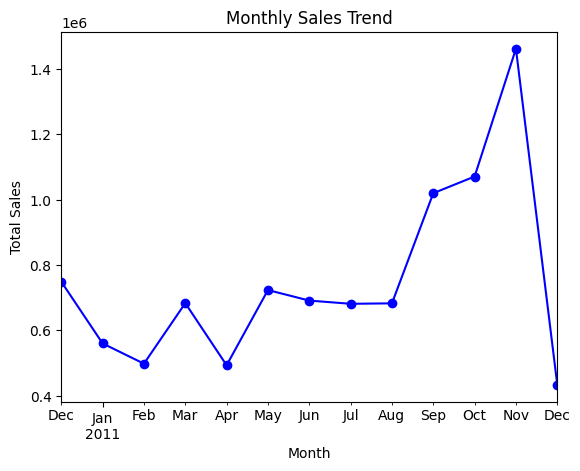

In [156]:
# Monthly Sales Trend
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Product Description')

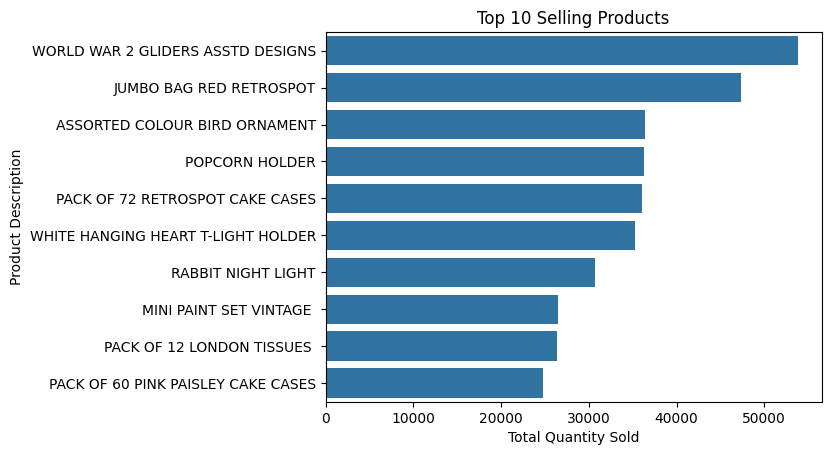

In [157]:
# Top 10 Selling Products
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')

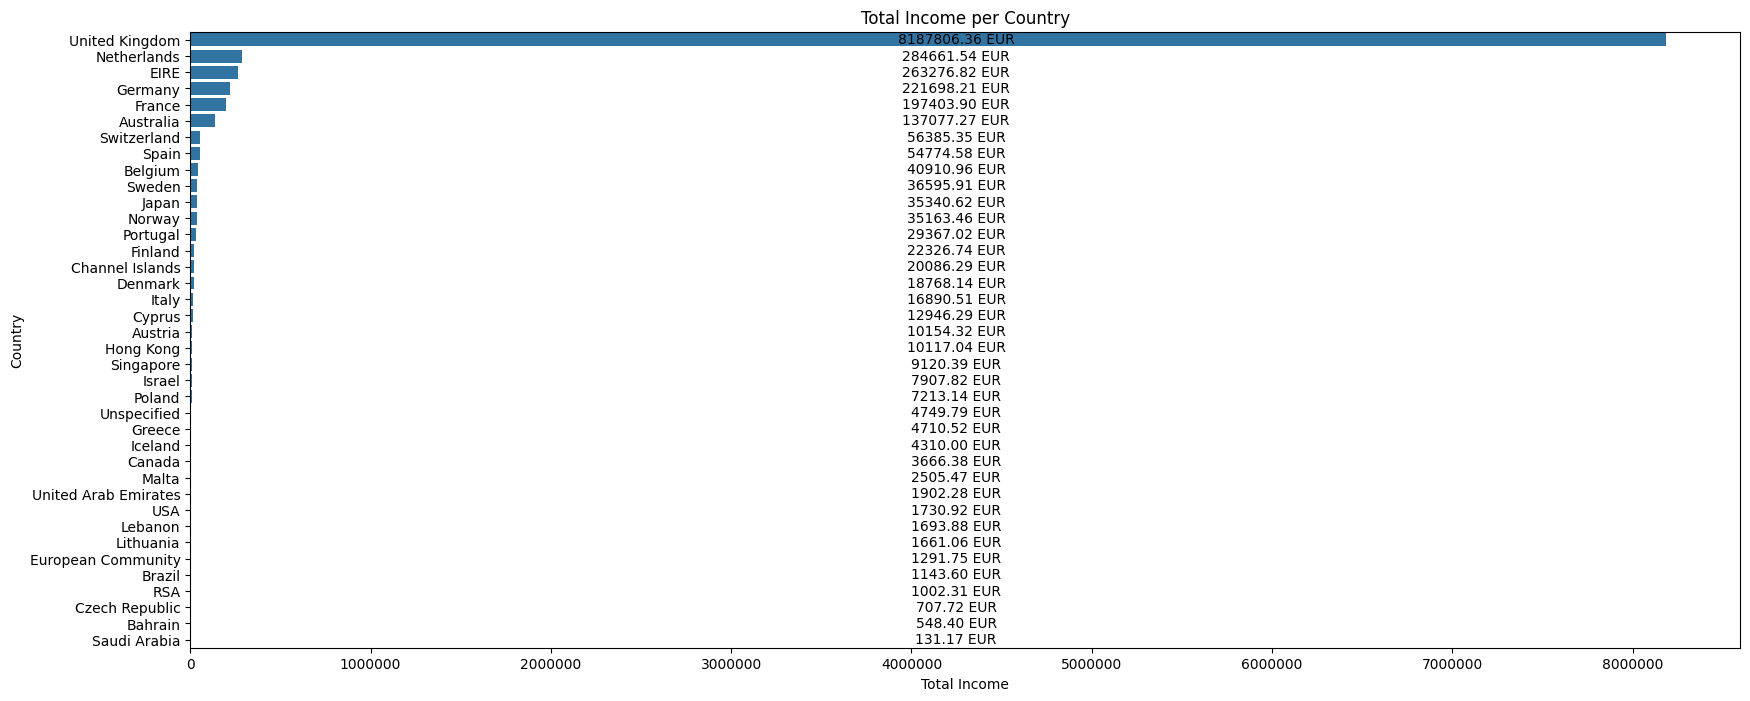

In [158]:
plt.figure(figsize=(20, 8))
bar_plot = sns.barplot(x=total_per_country.values,
            y=total_per_country.index)
plt.title('Total Income per Country')
plt.xlabel('Total Income')
plt.ylabel('Country')

# Adjusting x-axis to better display large numbers
plt.ticklabel_format(style='plain', axis='x')  # Turn off scientific notation

first_patch = None
# Show the numbers at the end of the bars
for p in bar_plot.patches:
    if not first_patch:
        first_patch = p
    bar_plot.annotate(format(p.get_width(), '.2f') + ' EUR',
                      (first_patch.get_width() / 2, p.get_y() + p.get_height() / 2.),
                      ha='center', va='center',
                      xytext=(20, 0),
                      textcoords='offset points')

In [159]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>